In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("sales_data_sample.csv", encoding='ISO-8859-1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
series_sum_sales = df.groupby("ORDERDATE")["SALES"].sum()

In [44]:
print(len(series_sum_sales))

252


In [6]:
import numpy as np

In [8]:
df_sum_sales = pd.DataFrame(series_sum_sales,dtype='object')
df_sum_sales["ds"] = pd.to_datetime(df_sum_sales.index)
df_sum_sales = df_sum_sales.rename(columns={"SALES":"y"})
df_sum_sales = df_sum_sales.sort_values(by=["ds"])
df_sum_sales = df_sum_sales.set_index(np.arange(len(series_sum_sales)))
df_sum_sales.tail()

,y,ds
247,31821.9,2005-05-13
248,59475.1,2005-05-17
249,51233.2,2005-05-29
250,14578.8,2005-05-30
251,78918,2005-05-31


In [10]:
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [11]:
m = Prophet(yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=True)

m.fit(df_sum_sales[['ds','y']])

future = m.make_future_dataframe(periods=70)
future.tail()



,ds
317,2005-08-05
318,2005-08-06
319,2005-08-07
320,2005-08-08
321,2005-08-09


In [12]:
forecast = m.predict(future)
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
317,2005-08-05,23358.032227,10271.422440,77697.404816,23357.378025,23358.683448,19522.689638,19522.689638,19522.689638,19522.689638,19522.689638,19522.689638,0.0,0.0,0.0,42880.721865
318,2005-08-06,23364.719222,10464.834694,73859.439543,23364.051282,23365.386989,19522.689638,19522.689638,19522.689638,19522.689638,19522.689638,19522.689638,0.0,0.0,0.0,42887.408859
319,2005-08-07,23371.406216,9796.747127,79715.941520,23370.717699,23372.086944,19522.689638,19522.689638,19522.689638,19522.689638,19522.689638,19522.689638,0.0,0.0,0.0,42894.095854
320,2005-08-08,23378.093210,11080.588431,75125.715121,23377.383974,23378.787342,19522.689638,19522.689638,19522.689638,19522.689638,19522.689638,19522.689638,0.0,0.0,0.0,42900.782848
321,2005-08-09,23384.780205,9877.093420,74827.191416,23384.060794,23385.495281,19522.689638,19522.689638,19522.689638,19522.689638,19522.689638,19522.689638,0.0,0.0,0.0,42907.469842


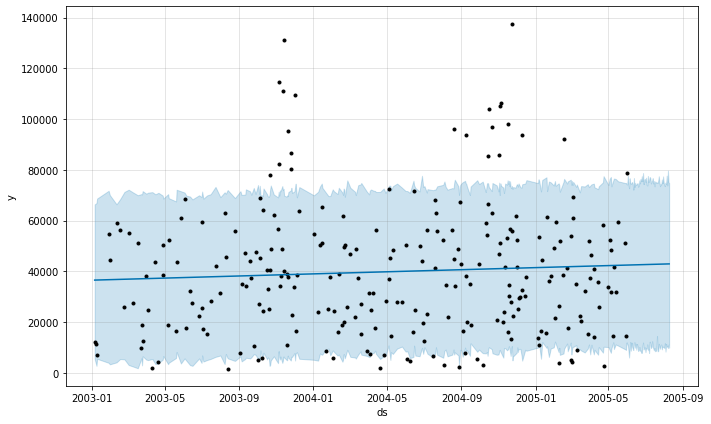

In [13]:
fig1 = m.plot(forecast)
